## `Pivot Table`
- A pivot table is a way to reorganize and summarize data by choosing rows, columns, and how to combine values (like sum or average).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# average bills paid by males and females
tips.groupby('sex')[['total_bill']].mean()

C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\4071150604.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [4]:
tips.groupby(['sex', 'smoker'])[['total_bill']].mean().unstack()

C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\2217331681.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex', 'smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [5]:
# using pivot table for above operation

tips.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill')

C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\286175744.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [6]:
# aggfunc can be used to apply multiple functions
# aggfunc = 'mean' is default
tips.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc= 'sum')

C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\1571636224.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc= 'sum')


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [7]:
tips.pivot_table(index = 'sex', columns = 'smoker', values = ['size', 'total_bill', 'tip'])

C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\2706687432.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = 'sex', columns = 'smoker', values = ['size', 'total_bill', 'tip'])


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [8]:
tips.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = 'total_bill')

C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\2846270962.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = 'total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [9]:
tips.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = ['size', 'total_bill', 'tip'], aggfunc= ['sum', 'mean', 'max'])

C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\1575622612.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = ['size', 'total_bill', 'tip'], aggfunc= ['sum', 'mean', 'max'])
C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\1575622612.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = ['size', 'total_bill', 'tip'], aggfunc= ['sum', 'mean', 'max'])
C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\1575622612.py:1: FutureWarning: The default value of observed=False is deprecated and will change to obse

sum                                                       \
               size                                                  tip   
day            Thur          Fri          Sat          Sun          Thur   
time          Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       23      0     5     12     0     71     0     39  30.58   
       No        50      0     0      4     0     85     0    124  58.83   
Female Yes       17      0     6      8     0     33     0     10  20.93   
       No        60      2     3      2     0     30     0     43  58.49   

                      ...   max                                                \
                      ...   tip                      total_bill                 
day                   ...   Fri           Sat    Sun       Thur           Fri   
time          Dinner  ... Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker         ...                                                       
Male   Yes       0.0  ...  2.20   4.73  10.00    6.5      32.68    NaN  13.42   
       No        0.0  ...   NaN   3.50   9.00    6.0      41.19    NaN    NaN   
Female Yes       0.0  ...  3.48   4.30   6.50    4.0      43.11    NaN  16.27   
       No        3.0  ...  3.00   3.25   4.67    5.2      34.83  18.78  15.98   

                                    
                                    
day                     Sat    Sun  
time          Dinner Dinner Dinner  
sex    smoker                       
Male   Yes     40.17  50.81  45.35  
       No      22.49  48.33  48.17  
Female Yes     16.32  44.30  20.90  
       No      22.75  35.83  35.26  

[4 rows x 60 columns]

In [10]:
tips.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc= 'sum', margins=True)

C:\Users\AliRaza\AppData\Local\Temp\ipykernel_9260\3752483179.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = 'sex', columns = 'smoker', values = 'total_bill', aggfunc= 'sum', margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [11]:
expenses = pd.read_csv('data\\expense_data.csv')

In [12]:
expenses.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [13]:
expenses['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [14]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [15]:
expenses['Date'] = pd.to_datetime(expenses['Date'])

In [16]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [17]:
expenses['Month'] = expenses['Date'].dt.month_name()

In [18]:
expenses.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


<Axes: xlabel='Month'>

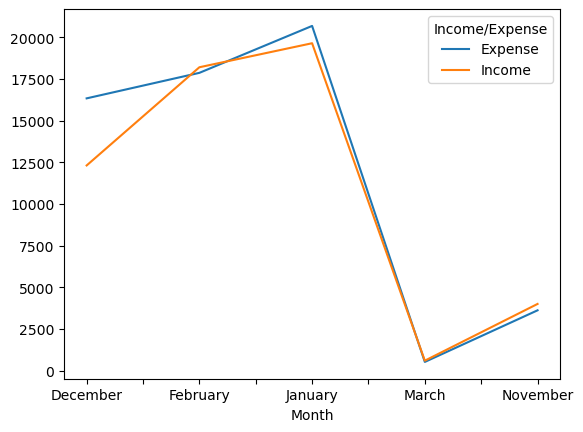

In [19]:
# plotting graphs using pivot table
expenses.pivot_table(index = 'Month', columns = 'Income/Expense', values = 'INR', aggfunc = 'sum', fill_value=0).plot()

<Axes: xlabel='Month'>

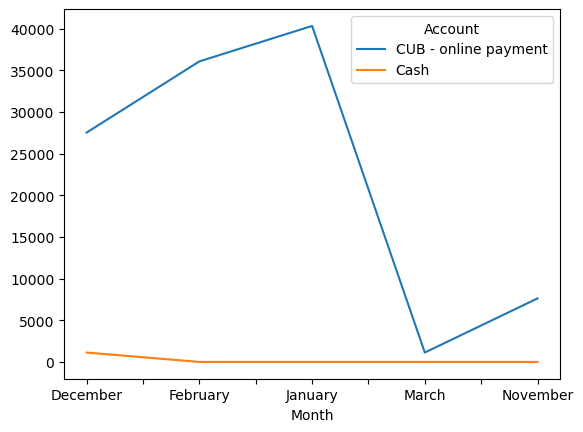

In [20]:
expenses.pivot_table(index = 'Month', columns = 'Account', values = 'INR', aggfunc = 'sum', fill_value=0).plot()